In [ ]:
Understand the data set (even with the open questions you have)
Do Exploratory Data Analysis.
Use Python and it's libraries for all your development needs.
Have a strategy for handling outliers / poor data quality on some rows.
Come up with approaches for forecasting the June 21 test set.
Compare and explain the different approaches you might have considered. (In your notebook)
Explain the final approach you have taken and why. (In your notebook)

In [105]:
#importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt



In [106]:
#importing training dataset
train_data = pd.read_csv('Training_Dataset.csv')
# Display basic information about the dataset
print(train_data.info())
# Summary statistics
print(train_data.describe())
# Check for missing values
print(train_data.isnull().sum())


#importing testing dataset
test_data = pd.read_csv('Test_Dataset.csv')

#dataset includes data on different aspects such as the type of product, the manufacturer, area code, sourcing channel, product size,
#product type, month of sourcing, and the associated sourcing cost.
#dataset could be used for various purposes such as analyzing trends in sourcing costs

# Handle missing values (if any)
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550176 non-null  object 
 1   Manufacturer       550176 non-null  object 
 2   Area Code          550176 non-null  object 
 3   Sourcing Channel   550176 non-null  object 
 4   Product Size       550176 non-null  object 
 5   Product Type       550176 non-null  object 
 6   Month of Sourcing  550176 non-null  object 
 7   Sourcing Cost      550176 non-null  float64
dtypes: float64(1), object(7)
memory usage: 33.6+ MB
None
       Sourcing Cost
count  550176.000000
mean      108.817286
std       104.390093
min      -196.070000
25%        57.000000
50%       132.000000
75%       146.150000
max     32632.500000
ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourci

C:\Users\HT212CR\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


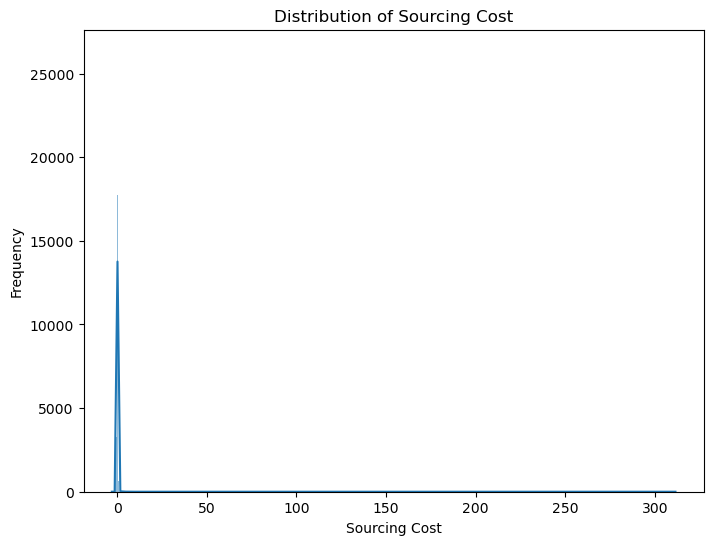

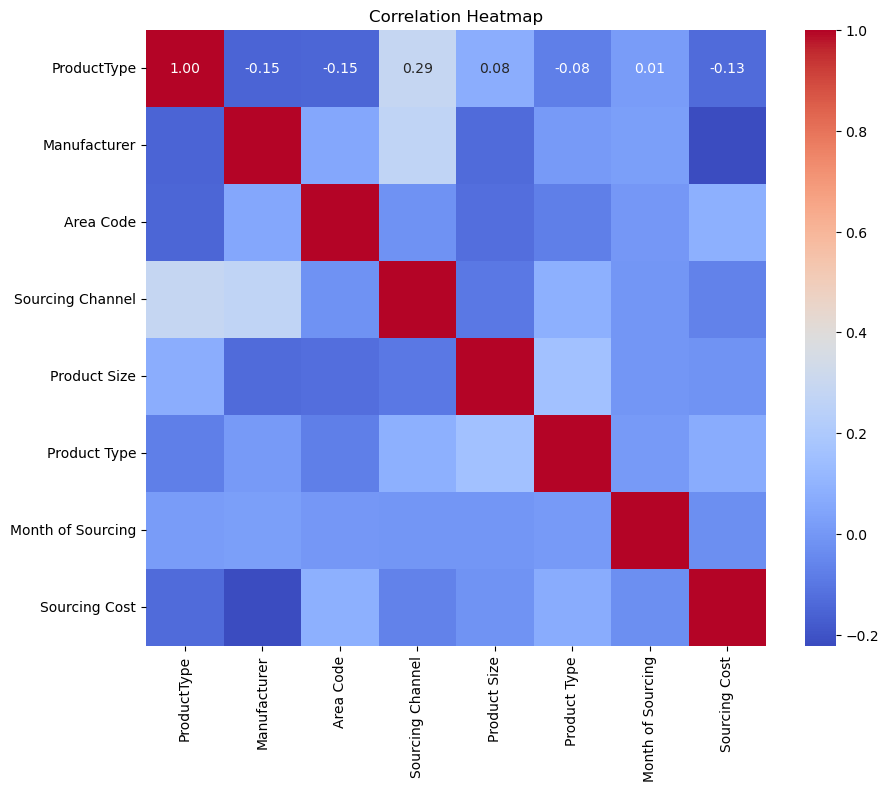

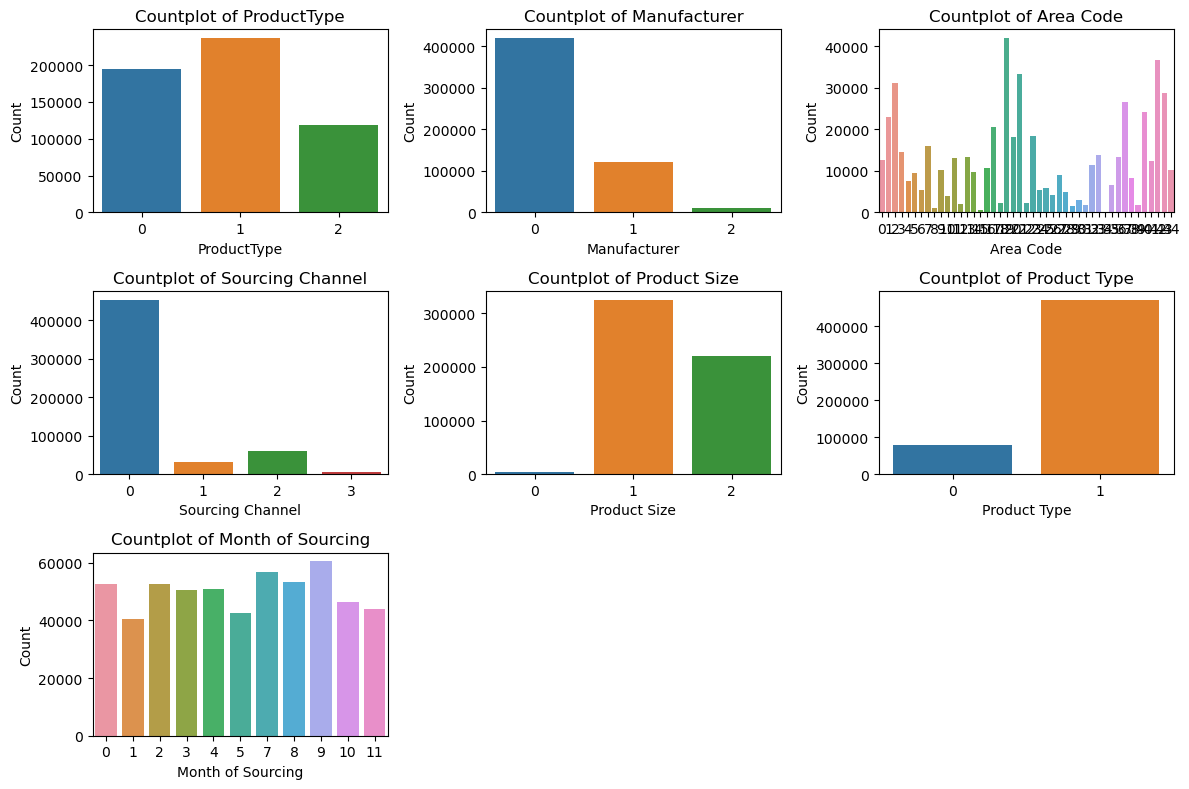

In [108]:

# Visualize distributions of target variable
plt.figure(figsize=(8, 6))
sns.histplot(y_train, kde=True)
plt.title('Distribution of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Countplot for categorical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=train_data[col])
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


# Model evaluation metrics dictionary
evaluation_metrics = {}

In [107]:

# Combine training and testing datasets to ensure LabelEncoder sees all unique values
combined_data = pd.concat([train_data, test_data])

# Encode categorical variables
categorical_cols = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']
encoder = LabelEncoder()
for col in categorical_cols:
    combined_data[col] = encoder.fit_transform(combined_data[col])

# Split combined data back into training and testing sets
train_data = combined_data[:len(train_data)]
test_data = combined_data[len(train_data):]

# Scale numerical variables
scaler = StandardScaler()
train_data['Sourcing Cost'] = scaler.fit_transform(train_data[['Sourcing Cost']])
test_data['Sourcing Cost'] = scaler.transform(test_data[['Sourcing Cost']])

# Separate features and target variable
X_train = train_data.drop(columns=['Sourcing Cost'])
y_train = train_data['Sourcing Cost']

X_test = test_data.drop(columns=['Sourcing Cost'])
y_test = test_data['Sourcing Cost']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in y_train:", y_train.isnull().sum())
print("Unique values in y_train:", y_train.unique())
print("Infinite values in y_train:", np.isinf(y_train).sum())
print("NaN values in y_train:", np.isnan(y_train).sum())


X_train shape: (550176, 7)
y_train shape: (550176,)
Missing values in X_train: 0
Missing values in y_train: 0
Unique values in y_train: [ -0.94508371   0.24391909  -0.92305095 ... 134.13069241 119.95069405
  34.44949499]
Infinite values in y_train: 0
NaN values in y_train: 0


C:\Users\HT212CR\AppData\Local\Temp\ipykernel_15156\193254322.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Sourcing Cost'] = scaler.fit_transform(train_data[['Sourcing Cost']])
C:\Users\HT212CR\AppData\Local\Temp\ipykernel_15156\193254322.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Sourcing Cost'] = scaler.transform(test_data[['Sourcing Cost']])


In [100]:


# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} Mean Squared Error: {mse}")
    print(f"{name} Mean Absolute Error: {mae}")
    print("="*50)


Training Linear Regression...
Linear Regression Mean Squared Error: 0.19802378756190384
Linear Regression Mean Absolute Error: 0.346592563042166
Training Random Forest...
Random Forest Mean Squared Error: 5.0025737603548714
Random Forest Mean Absolute Error: 0.42700457133946906
Training Gradient Boosting...
Gradient Boosting Mean Squared Error: 0.13444956507932582
Gradient Boosting Mean Absolute Error: 0.23737709227612902


In [109]:
#analysis of approaches used-
#Linear Regression: This model assumes a linear relationship between the features and the target variable. It may perform well if the relationship is indeed linear, but it could be limited in capturing complex patterns.
#Random Forest: This ensemble model works well with both numerical and categorical features, handling non-linear relationships effectively. It tends to perform well out-of-the-box and is less prone to overfitting.
#Gradient Boosting: Another ensemble model, it builds trees sequentially, each one correcting errors made by the previous model. It often provides better predictive accuracy but can be computationally expensive.

In [95]:
# Select June 2021 data from the testing set
june_21_data = test_data[test_data['Month of Sourcing'] == encoder.transform(['Jun-21'])[0]]

# Separate features and target variable for June 2021 data
X_june_21 = june_21_data.drop(columns=['Sourcing Cost'])
y_true_june_21 = june_21_data['Sourcing Cost']


# Display predictions with labels for June 2021 for all models
for model_name, preds in predictions.items():
    print(f"Predictions for June 2021 using {model_name}:")
    for i, pred in enumerate(preds):
        print(f"Prediction {i+1}: {pred:.2f} (Sourcing Cost), Actual: {y_true_june_21.iloc[i]:.2f} (Sourcing Cost)")
    print("=" * 50)



Predictions for June 2021 using Linear Regression:
Prediction 1: 0.18 (Sourcing Cost), Actual: -0.05 (Sourcing Cost)
Prediction 2: 0.25 (Sourcing Cost), Actual: 0.45 (Sourcing Cost)
Prediction 3: 0.32 (Sourcing Cost), Actual: 0.33 (Sourcing Cost)
Prediction 4: 0.26 (Sourcing Cost), Actual: 0.29 (Sourcing Cost)
Prediction 5: 0.31 (Sourcing Cost), Actual: 0.58 (Sourcing Cost)
Prediction 6: 0.31 (Sourcing Cost), Actual: 0.58 (Sourcing Cost)
Prediction 7: 0.29 (Sourcing Cost), Actual: -0.58 (Sourcing Cost)
Prediction 8: 0.29 (Sourcing Cost), Actual: -0.50 (Sourcing Cost)
Prediction 9: 0.16 (Sourcing Cost), Actual: 0.16 (Sourcing Cost)
Prediction 10: 0.36 (Sourcing Cost), Actual: 0.46 (Sourcing Cost)
Prediction 11: 0.30 (Sourcing Cost), Actual: 0.40 (Sourcing Cost)
Prediction 12: 0.39 (Sourcing Cost), Actual: 0.24 (Sourcing Cost)
Prediction 13: 0.33 (Sourcing Cost), Actual: -0.13 (Sourcing Cost)
Prediction 14: 0.42 (Sourcing Cost), Actual: 0.30 (Sourcing Cost)
Prediction 15: 0.47 (Sourcing 